In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel(r'Data for Crockart et al. 2.0.xlsx',sheet_name='Practice')
df.columns= ['year','Alpha_Na_annual','Charlie_Na_annual','Main_Na_annual','Average_Na_annual','Alpha_Cl_annual','Charlie_Cl_annual','Main_Cl_annual','Average_Cl_annual']

In [2]:
df.describe()

,year,Alpha_Na_annual,Charlie_Na_annual,Main_Na_annual,Average_Na_annual,Alpha_Cl_annual,Charlie_Cl_annual,Main_Cl_annual,Average_Cl_annual
count,42.000000,38.000000,41.000000,33.000000,42.000000,38.000000,41.000000,33.000000,42.000000
mean,1995.500000,-0.241297,-0.246186,-0.202383,-0.230607,-0.058493,-0.080720,-0.053199,-0.061575
std,12.267844,0.148402,0.161092,0.139415,0.130061,0.141355,0.151387,0.137868,0.127770
min,1975.000000,-0.535641,-0.723036,-0.477624,-0.528260,-0.366343,-0.417468,-0.330332,-0.353515
25%,1985.250000,-0.351786,-0.337096,-0.303161,-0.315460,-0.160959,-0.168923,-0.152190,-0.156896
50%,1995.500000,-0.225573,-0.215403,-0.206171,-0.213034,-0.025724,-0.082942,-0.056794,-0.060688
75%,2005.750000,-0.137094,-0.119168,-0.088313,-0.150501,0.052511,0.052420,0.050951,0.033302
max,2016.000000,0.002620,0.020332,0.042889,-0.013032,0.227138,0.221898,0.189265,0.165653


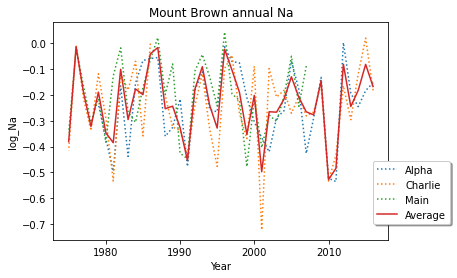

In [10]:
import matplotlib.pyplot as plt
plt.plot(df.year,df.Alpha_Na_annual,':',df.year,df.Charlie_Na_annual,':',df.year,df.Main_Na_annual,':',df.year,df.Average_Na_annual)
plt.ylabel('log_Na')
plt.xlabel('Year')
plt.legend(['Alpha', 'Charlie', 'Main','Average'],loc='lower right',bbox_to_anchor=(1.2,.05), shadow=True)
plt.title('Mount Brown annual Na')
plt.show()

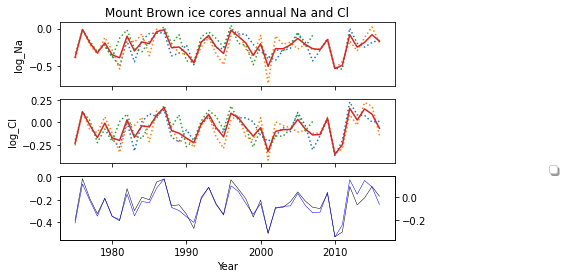

In [7]:
lw=0.5
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, sharex='col')
ax1.plot(df.year,df.Alpha_Na_annual,':',df.year,df.Charlie_Na_annual,':',df.year,df.Main_Na_annual,':',df.year,df.Average_Na_annual)
ax2.plot(df.year,df.Alpha_Cl_annual,':',df.year,df.Charlie_Cl_annual,':',df.year,df.Main_Cl_annual,':',df.year,df.Average_Cl_annual)
ax1.set_ylabel('log_Na')
ax2.set_ylabel('log_Cl')
plt.xlabel('Year')
plt.legend(['Alpha', 'Charlie', 'Main','Average'],loc='center right',bbox_to_anchor=(1.5,1.1), shadow=True)
ax1.set_title('Mount Brown ice cores annual Na and Cl')
ax3.plot(df.year,df.Average_Na_annual,lw=lw,c='k')
ax4 = ax3.twinx()
ax4.plot(df.year,df.Average_Cl_annual,lw=lw,c='b')
plt.show()

In [51]:
from matplotlib import pyplot as plt
from scipy import signal
from scipy import fft
s_to_yrs = 1/(60*60*24*365)

In [43]:
year = np.zeros(42)
for i in range (42):
    year[i]=df.year[i]
time = np.flip(year)
ave_na_ann = np.zeros(42)
for i in range (42):
    ave_na_ann[i]=df.Average_Na_annual[i]
Average_Na_Annual = np.flip(ave_na_ann)

In [52]:
time_seconds = (time-np.min(time))*365*24*60*60
f, PUU = signal.welch(Average_Na_Annual,1/np.diff(time_seconds)[0],nperseg=len(time),scaling='spectrum')
f_smooth, PUU_smooth = signal.welch(Average_Na_Annual,1/np.diff(time_seconds)[0],nperseg=int(1/s_to_yrs/np.diff(time_seconds)[0]),scaling='spectrum')

In [55]:
int(1/s_to_yrs/np.diff(time_seconds)[0])

1

In [58]:
1/s_to_yrs/np.diff(time_seconds)[0]/12

0.08333333333333333

Text(0, 0.5, 'log Average_Na_Annual')

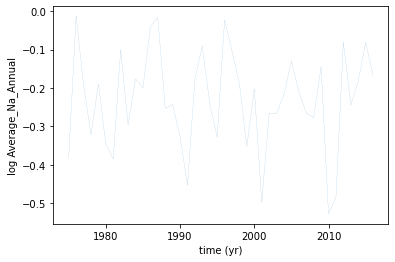

In [46]:
plt.plot(time,Average_Na_Annual,lw=0.1)
plt.xlabel('time (yr)')
plt.ylabel('log Average_Na_Annual')

Text(0, 0.5, 'power (m$^2$/s$^2$)')

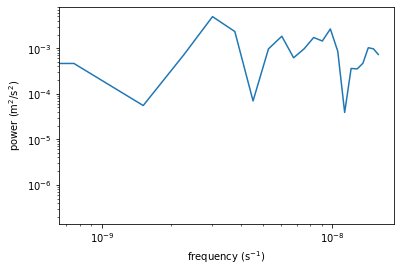

In [74]:
plt.plot(f, PUU)
#plt.plot(f_smooth, PUU_smooth)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('frequency (s$^{-1}$)')
plt.ylabel('power (m$^2$/s$^2$)')